In [27]:
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures


In [5]:
# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [13]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)
    

In [4]:
irisdata = datasets.load_iris()
irisdata['feature_names']
X = irisdata['data'][:, (2, 3)]
y = (irisdata['target'] == 2).astype(np.float64)

In [24]:
svm_clf = Pipeline([
        ('poly_feat', PolynomialFeatures(degree = 3)),
        ('scaler', StandardScaler()),
        ('linSVC', LinearSVC(C = 0.5, loss = 'hinge'))
])


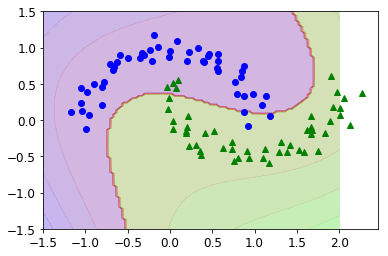

In [25]:
make_moons = datasets.make_moons
X, y = make_moons(n_samples = 100, noise = 0.1, random_state=42)
svm_clf.fit(X, y)
plt.plot(X[y == 0, 0], X[y == 0, 1], 'bo')
plt.plot(X[y == 1, 0], X[y == 1, 1], 'g^')
plot_predictions(svm_clf, [-1.5, 2, -1.5, 1.5])

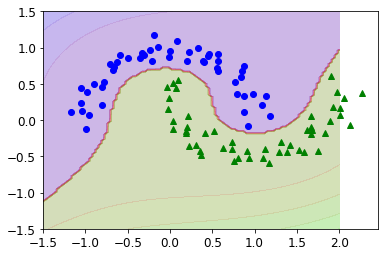

In [31]:
polyker_svm_clf = Pipeline([
        ('scaler', StandardScaler()),
        ('polySVC', SVC(C = 5, kernel = 'poly', degree = 3, coef0 = 1))
])

polyker_svm_clf.fit(X, y)
plt.plot(X[y == 0, 0], X[y == 0, 1], 'bo')
plt.plot(X[y == 1, 0], X[y == 1, 1], 'g^')
plot_predictions(polyker_svm_clf, [-1.5, 2, -1.5, 1.5])


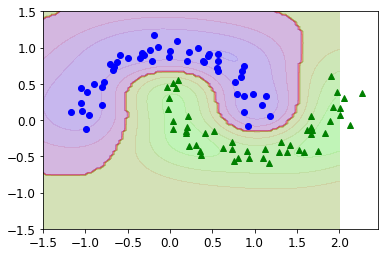

In [41]:
rbfker_svm_clf = Pipeline([
        ('scaler', StandardScaler()),
        ('polySVC', SVC(C = 5, kernel = 'rbf', gamma = 1))
])

rbfker_svm_clf.fit(X, y)
plt.plot(X[y == 0, 0], X[y == 0, 1], 'bo')
plt.plot(X[y == 1, 0], X[y == 1, 1], 'g^')
plot_predictions(rbfker_svm_clf, [-1.5, 2, -1.5, 1.5])